# Plotting and Visualization
Focuse on **matplotlib**(mostly two-dimensional) and **seaborn**

## 1. A Brief matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [109]:
import pandas as pd

In [3]:
%matplotlib notebook
## to use interactive plotting in the Jupyter notebook

### 1.1 Figures and Subplots

Create a **Figure** object:
>plt.figure(figsize=num)


<IPython.core.display.Javascript object>


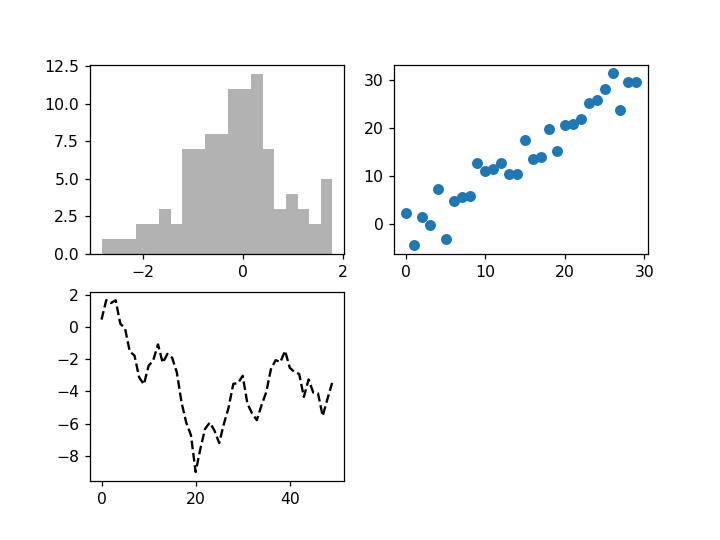

In [48]:
fig = plt.figure()

Create **subplots**:  
U can create one or more subplots by:
>add_subplot(n, n, n)

In [49]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

When issue a plotting command like **plt.plot( [ ...])**, plt draws on **the last figure and subplot** used.

In [50]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
# k-- is a style option, means black dashed line, it can also have been written more explicitly as:
#plt.plot(np.random.randn(50).cumsum(), color = 'k', linestyle = 'dashed')

Histogram：柱状图

In [51]:
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
# return s a numpy array
_

(array([ 1.,  1.,  1.,  2.,  2.,  3.,  2.,  7.,  7.,  8.,  8., 11., 11.,
        12.,  7.,  3.,  4.,  3.,  2.,  5.]),
 array([-2.82855032, -2.59754625, -2.36654218, -2.1355381 , -1.90453403,
        -1.67352996, -1.44252588, -1.21152181, -0.98051774, -0.74951366,
        -0.51850959, -0.28750552, -0.05650144,  0.17450263,  0.4055067 ,
         0.63651078,  0.86751485,  1.09851893,  1.329523  ,  1.56052707,
         1.79153115]),
 <a list of 20 Patch objects>)

scatter：散点图

In [52]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

>plt.subplots()

Creates a new figure and retures a NumPy array containing the created subbplot objects

<IPython.core.display.Javascript object>


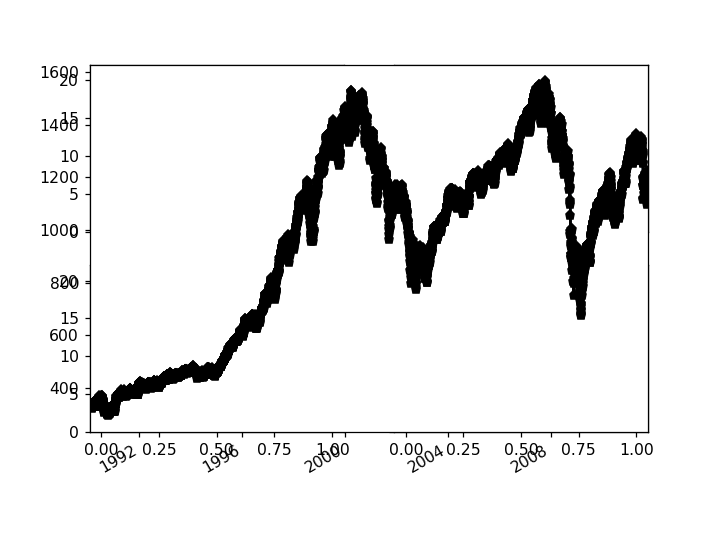

In [69]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [75]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D195F57C48>,
      dtype=object)

In [76]:
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)

### Adjusting the spacing around subplots

>subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height

In [77]:
#shrink the spacing all the way to zero
plt.subplots_adjust(wspace=0, hspace=0)

matplotlib doesn't check whether the **labels overlap.** (following sections will show u how to fix it)

### 1.2 Colors, Markers, and Line Styles

<IPython.core.display.Javascript object>


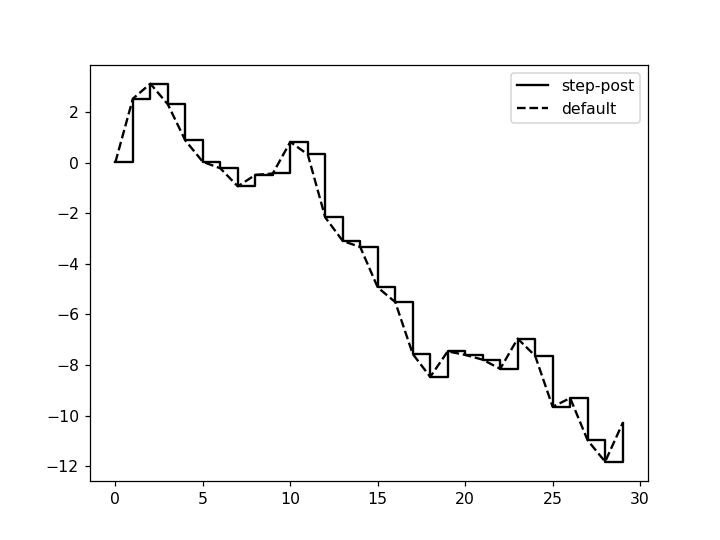

In [84]:
data = np.random.randn(30).cumsum()
fig1, ax1 = plt.subplots(1, 1)

In [85]:
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'step-post')
plt.plot(data, 'k--', label = 'default')
plt.legend(loc = 'best')
#plt.show()

### 1.3 Ticks, and Labels
**xlim, xticks, xticklabels** control the plot range, tick locations, and tick labels  
>plt.xlim()  
>ax.get_xlim()  
>ax.set_xlim()  

<IPython.core.display.Javascript object>


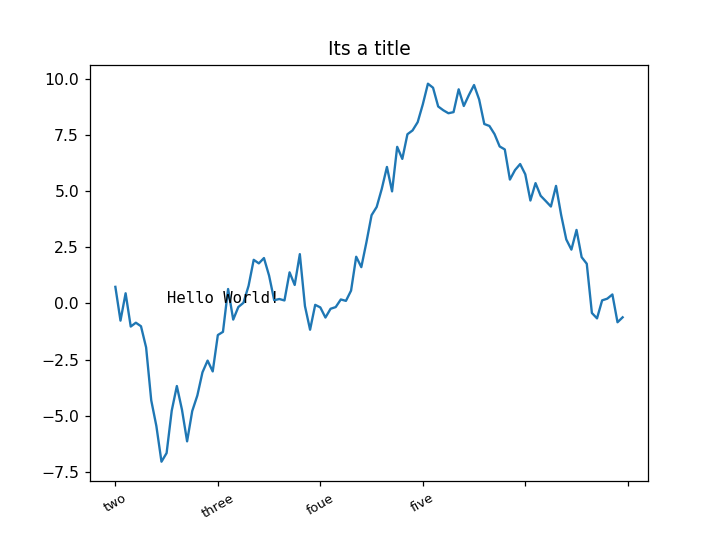

In [102]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(np.random.randn(100).cumsum())

Change the **x-axis ticks**
>ax.set_xticks()  
>ax.set_xticklabels()

In [89]:
ticks = ax2.set_xticks([0, 25, 50, 75, 100])

In [103]:
labels = ax2.set_xticklabels(['one', 'two', 'three', 'foue', 'five'], rotation = 30, fontsize = 'small')

In [104]:
ax2.set_title('Its a title')

Text(0.5, 1, 'Its a title')

In [105]:
ax2.set_label('Stages')

### 1.4 Annotations(注解) and Drawing on a Subplot
**text, arrow, and annotate**  
>ax.text()

In [106]:
ax2.text(10, 0, 'Hello World!', family = 'monospace', fontsize = 10)

Text(10, 0, 'Hello World!')

>ax.annotate()

In [107]:
from datetime import datetime

In [126]:
data = pd.read_csv("examples/spx.csv", index_col = 0, parse_dates = True)
spx = data['SPX']

<IPython.core.display.Javascript object>


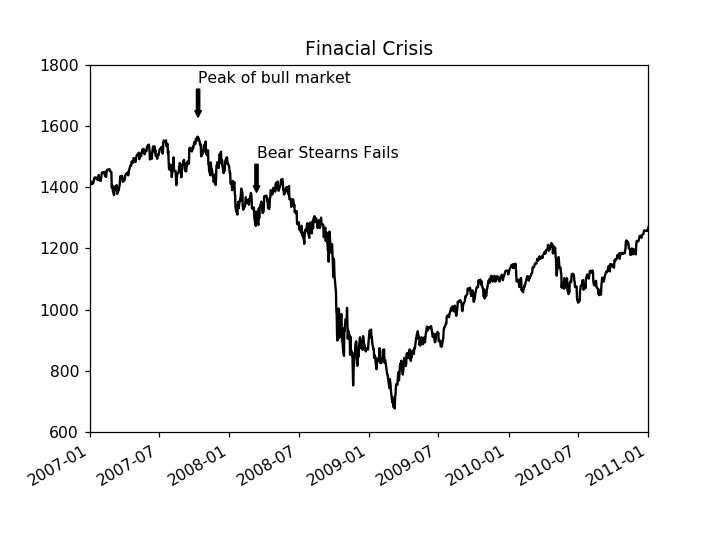

In [134]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

spx.plot(ax= ax3, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails')
]

for date, label in crisis_data:
    ax3.annotate(label, 
                 xy = (date, spx.asof(date) +75),
                 xytext = (date, spx.asof(date) + 225),
                 arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4),
                 horizontalalignment = 'left',
                 verticalalignment = 'top'
                )


In [135]:
# Zoom in on 2007 - 2010
ax3.set_xlim(['1/1/2007', '1/1/2011'])

(732677.0, 734138.0)

In [136]:
ax3.set_ylim([600, 1800])

(600, 1800)

In [137]:
ax3.set_title("Finacial Crisis")

Text(0.5, 1, 'Finacial Crisis')

### 1.5 Saving Plots to File
>plt.savefig('filepath', dpi = num, bbox_inches = 'tight')

In [141]:
plt.savefig('examples/figpath.png', dpi = 400, bbox_inches = 'tight')

### 1.6 matplotlib Configuration
>plt.rc
customize via an extensive set of global parameters